### Imports

In [26]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from numpy import mean
from numpy import std
import statsmodels.api as sm
import math
from scipy import stats
from statsmodels.stats import weightstats as stests
%matplotlib inline

In [2]:
qwerty =1

In [3]:
df_original = pd.read_csv("predicting_carbon_emissions.csv")
df = df_original.copy()

### Cleaning

In [4]:
pd.set_option('display.max_columns', 999)

In [5]:
#change column names to not have brackets
df.columns = df.columns.str.strip().str.replace('(', '').str.replace(')', '')

In [6]:
#drop columns
columns_to_drop = ['Ticker', 'ISIN','Account ID']
df.drop(columns_to_drop, axis=1, inplace=True)

In [7]:
# Dropping the Company Names with incomplete Carbon Info
df = df[df["Company Name"] != 'Kathmandu Holdings']
df = df[df["Company Name"] != 'Stephenson Harwood']
df = df[df["Company Name"] != 'Nordic Semiconductor ASA']

#### Creating Reported Scope Columns (can be changed into classes) and Revenue Column

In [8]:
#change values in Reported Scope 1 column to not have , or -, then change to floats. replace null values with 0
df["Reported Scope 1 tCO2e"] = df["Reported Scope 1 tCO2e"].str.strip().str.replace(',', '').str.replace('-','0').astype(float)
df["Reported Scope 1 tCO2e"].fillna(0,inplace=True)

In [9]:
#change values in Estimated Scope 1 column to not have , or -, then change to floats. replace null values with 0
df["Estimated Scope 1 tCO2e"] = df["Estimated Scope 1 tCO2e"].astype(str).str.strip().str.replace(',', '').str.replace('-','0').astype(float)
df["Estimated Scope 1 tCO2e"].fillna(0,inplace=True)

In [10]:
#create column for scope
df['Scope 1 tCO2e'] = df["Reported Scope 1 tCO2e"]+df["Estimated Scope 1 tCO2e"]

In [11]:
#change values in Reported Scope 1 column to not have , or -, then change to floats. replace null values with 0
df["Reported location-based Scope 2 tCO2e"] = df["Reported location-based Scope 2 tCO2e"].str.strip().str.replace(',', '').str.replace('-','0').astype(float)
df["Reported location-based Scope 2 tCO2e"].fillna(0,inplace=True)

In [12]:
#change values in Estimated Scope 1 column to not have , or -, then change to floats. replace null values with 0
df["Estimated location-based Scope 2 tCO2e"] = df["Estimated location-based Scope 2 tCO2e"].astype(str).str.strip().str.replace(',', '').str.replace('-','0').astype(float)
df["Estimated location-based Scope 2 tCO2e"].fillna(0,inplace=True)

In [13]:
#create column for scope
df['Scope 2 tCO2e'] = df["Reported location-based Scope 2 tCO2e"]+df["Estimated location-based Scope 2 tCO2e"]

In [14]:
df['Scope 1 and 2 tCO2e'] = df["Scope 1 tCO2e"]+df["Scope 2 tCO2e"]

In [15]:
df["Revenue"] = round((df['Scope 1 and 2 tCO2e'])/(df["Carbon Emission  tCO2e/mmUSD"]),3)

#### Creating Dummy Columns with Binary of GICS Sectors

In [16]:
df = pd.concat([df,pd.get_dummies(df['GICS Sector'])], axis=1)
df.head(2)

,Company Name,Listed,HQ Country,GICS Sector,Accounting Year End,Reported Scope 1 tCO2e,Estimated Scope 1 tCO2e,Scope 1 source,Scope 1 quality flag,Reported market-based Scope 2 tCO2e,Note,Reported location-based Scope 2 tCO2e,Estimated location-based Scope 2 tCO2e,Location-based Scope 2 source,Location-based Scope 2 quality flag,Scope 2 company comments,GHG revenue intensity tCO2e/mmUSD,Scope 2 figure used for intensity,amplification.wordsindex,DeAmplification.wordsindex,HE_negativeindex,HE_positiveindex,angerindex,anticipationindex,disgustindex,fearindex,joyindex,sadnessindex,surpriseindex,trustindex,LMnegativeindex,LMpositiveindex,LMuncertaintyindex,BasicNegativeWordsindex,PositivePolarisedindex,NegativePolarisedindex,PowerWordsindex,PrudentialNegativeindex,PrudentialPositiveindex,PrudentialTopNegativeindex,Strategyindex,Financial.termsindex,Regulationindex,Technologyindex,Healthcareindex,Environmentindex,Socialindex,Governanceindex,ESGindex,LMuncertaintyindex.1,Regulationindex.1,Environmentindex.1,Socialindex.1,Governanceindex.1,ESGindex.1,ISIN lower,2016vol,2017vol,2018vol,2019vol,VolFactor,Carbon Emission tCO2e/mmUSD,Scope 1 tCO2e,Scope 2 tCO2e,Scope 1 and 2 tCO2e,Revenue,Consumer Discretionary,Consumer Staples,Energy,Financials,Health Care,Industrials,Information Technology,Materials,Real Estate,Telecommunication Services,Utilities
0,Agencia de Proteccion Ambiental,Yes,NaN,NaN,29/09/2016,0.65,0.0,Reported: Company Filings,NaN,NaN,,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.32,0.32,0.25,0.28,0.31,0.32,NaN,NaN,NaN,NaN,NaN,0.000000,539.281077,0.65,0.0,0.65,0.001,0,0,0,0,0,0,0,0,0,0,0
1,Sociedad Comercial del Plata SA,Yes,Argentina,Energy,31/12/2016,0.00,1400.0,Estimated: Gamma GLM,2.0,NaN,NA,0.0,3000.0,Estimated: IEA National Grid Emissions Factor ...,3.0,NaN,26.03,Location-based,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.32,0.32,0.25,0.28,0.31,0.32,arp290071462,0.023033,0.023079,0.033899,0.0217,0.178446,26.030882,1400.00,3000.0,4400.00,169.030,0,0,1,0,0,0,0,0,0,0,0


#### Removing Agencia de Proteccion Ambiental due to Nulls

In [17]:
df.drop(df.index[0],inplace=True)

In [18]:
df.head(2)

,Company Name,Listed,HQ Country,GICS Sector,Accounting Year End,Reported Scope 1 tCO2e,Estimated Scope 1 tCO2e,Scope 1 source,Scope 1 quality flag,Reported market-based Scope 2 tCO2e,Note,Reported location-based Scope 2 tCO2e,Estimated location-based Scope 2 tCO2e,Location-based Scope 2 source,Location-based Scope 2 quality flag,Scope 2 company comments,GHG revenue intensity tCO2e/mmUSD,Scope 2 figure used for intensity,amplification.wordsindex,DeAmplification.wordsindex,HE_negativeindex,HE_positiveindex,angerindex,anticipationindex,disgustindex,fearindex,joyindex,sadnessindex,surpriseindex,trustindex,LMnegativeindex,LMpositiveindex,LMuncertaintyindex,BasicNegativeWordsindex,PositivePolarisedindex,NegativePolarisedindex,PowerWordsindex,PrudentialNegativeindex,PrudentialPositiveindex,PrudentialTopNegativeindex,Strategyindex,Financial.termsindex,Regulationindex,Technologyindex,Healthcareindex,Environmentindex,Socialindex,Governanceindex,ESGindex,LMuncertaintyindex.1,Regulationindex.1,Environmentindex.1,Socialindex.1,Governanceindex.1,ESGindex.1,ISIN lower,2016vol,2017vol,2018vol,2019vol,VolFactor,Carbon Emission tCO2e/mmUSD,Scope 1 tCO2e,Scope 2 tCO2e,Scope 1 and 2 tCO2e,Revenue,Consumer Discretionary,Consumer Staples,Energy,Financials,Health Care,Industrials,Information Technology,Materials,Real Estate,Telecommunication Services,Utilities
1,Sociedad Comercial del Plata SA,Yes,Argentina,Energy,31/12/2016,0.00,1400.0,Estimated: Gamma GLM,2.0,NaN,NA,0.0,3000.0,Estimated: IEA National Grid Emissions Factor ...,3.0,NaN,26.03,Location-based,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.32,0.32,0.25,0.28,0.31,0.32,arp290071462,0.023033,0.023079,0.033899,0.0217,0.178446,26.030882,1400.00,3000.0,4400.00,169.03,0,0,1,0,0,0,0,0,0,0,0
2,Banco de Galicia y Buenos Aires S.A.,Yes,Argentina,Financials,31/12/2016,933.37,0.0,Reported: CDP (Not Reviewed),NaN,NaN,NA,27626.0,0.0,Reported: CDP (Not Reviewed),NaN,NaN,7.97,Location-based,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.32,0.32,0.25,0.28,0.31,0.32,NaN,NaN,NaN,NaN,NaN,0.000000,7.968841,933.37,27626.0,28559.37,3583.88,0,0,0,1,0,0,0,0,0,0,0


In [19]:
df = df.dropna(subset=['Scope 2 figure used for intensity'], how='any')

In [20]:
# df = df[df.angerindex != 0]

- 0 -> both reported
- 1 -> Mixed
- 2 -> bo

In [21]:
df1 = df.dropna(subset = ['Location-based Scope 2 source','Scope 1 source']).reset_index(drop=True)

In [22]:
for i, row in df1.iterrows():
#     print(i)
    if ("Estimated" in row["Scope 1 source"]) and ("Estimated" in row["Location-based Scope 2 source"]):
        df1.loc[i,'Estimated or not'] = "Estimated"
    elif ("Reported" in row["Scope 1 source"]) and ("Reported" in row["Location-based Scope 2 source"]):
        df1.loc[i,'Estimated or not'] = "Reported"
    else:
        df1.loc[i,'Estimated or not'] = "Mixed"


In [23]:
df1['Estimated or not'].value_counts()

Reported     2333
Estimated    1398
Mixed         138
Name: Estimated or not, dtype: int64

In [24]:
df1.tail()

,Company Name,Listed,HQ Country,GICS Sector,Accounting Year End,Reported Scope 1 tCO2e,Estimated Scope 1 tCO2e,Scope 1 source,Scope 1 quality flag,Reported market-based Scope 2 tCO2e,Note,Reported location-based Scope 2 tCO2e,Estimated location-based Scope 2 tCO2e,Location-based Scope 2 source,Location-based Scope 2 quality flag,Scope 2 company comments,GHG revenue intensity tCO2e/mmUSD,Scope 2 figure used for intensity,amplification.wordsindex,DeAmplification.wordsindex,HE_negativeindex,HE_positiveindex,angerindex,anticipationindex,disgustindex,fearindex,joyindex,sadnessindex,surpriseindex,trustindex,LMnegativeindex,LMpositiveindex,LMuncertaintyindex,BasicNegativeWordsindex,PositivePolarisedindex,NegativePolarisedindex,PowerWordsindex,PrudentialNegativeindex,PrudentialPositiveindex,PrudentialTopNegativeindex,Strategyindex,Financial.termsindex,Regulationindex,Technologyindex,Healthcareindex,Environmentindex,Socialindex,Governanceindex,ESGindex,LMuncertaintyindex.1,Regulationindex.1,Environmentindex.1,Socialindex.1,Governanceindex.1,ESGindex.1,ISIN lower,2016vol,2017vol,2018vol,2019vol,VolFactor,Carbon Emission tCO2e/mmUSD,Scope 1 tCO2e,Scope 2 tCO2e,Scope 1 and 2 tCO2e,Revenue,Consumer Discretionary,Consumer Staples,Energy,Financials,Health Care,Industrials,Information Technology,Materials,Real Estate,Telecommunication Services,Utilities,Estimated or not
3864,Zillow Group,Yes,USA,Information Technology,31/12/2016,0.0,1300.0,Estimated: Gamma GLM,5.0,NaN,NA,0.0,7300.0,Estimated: IEA National Grid Emissions Factor ...,5.0,NaN,10.16,Location-based,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.32,0.32,0.25,0.28,0.31,0.32,us98954m1018,0.026123,0.018770,0.032243,0.043305,0.017794,10.158400,1300.0,7300.0,8600.0,846.59,0,0,0,0,0,0,1,0,0,0,0,Estimated
3865,ZAYO,Yes,USA,Telecommunication Services,31/08/2016,0.0,17000.0,"Issue Raised, see comments (estimate shown for...",5.0,NaN,NA,0.0,100000.0,"Issue Raised, see comments (estimate shown for...",5.0,NaN,53.19,Location-based,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.32,0.32,0.25,0.28,0.31,0.32,NaN,NaN,NaN,NaN,NaN,0.000000,53.186653,17000.0,100000.0,117000.0,2199.80,0,0,0,0,0,0,0,0,0,1,0,Mixed
3866,"Zimmer Biomet Holdings, Inc.",Yes,USA,Health Care,31/12/2016,12618.0,0.0,Reported: CDP (Reviewed),7.0,NaN,NA,74715.0,0.0,Reported: CDP (Reviewed),7.0,NaN,11.37,Location-based,101,143,111,86,123,107,131,103,129,88,122,101,97,117,135,114,127,114,122,100,23,87,74,74,90,40,59,56,66,16,45,0.03,0.08,0.15,0.27,0.23,0.11,us98956p1021,0.015261,0.012057,0.014494,0.014492,0.447870,11.365713,12618.0,74715.0,87333.0,7683.90,0,0,0,0,1,0,0,0,0,0,0,Reported
3867,Olympic Steel Inc,Yes,USA,Materials,31/12/2016,0.0,1100000.0,Estimated: Gamma GLM,4.0,NaN,NA,0.0,230000.0,Estimated: IEA National Grid Emissions Factor ...,5.0,NaN,1260.52,Location-based,108,114,42,134,101,92,131,78,127,115,87,99,72,100,102,99,100,99,97,93,125,83,0,110,68,12,28,133,63,23,73,0.12,0.12,0.15,0.25,0.16,0.13,us68162k1060,0.043129,0.032546,0.025480,0.028482,0.068421,1260.520130,1100000.0,230000.0,1330000.0,1055.12,0,0,0,0,0,0,0,1,0,0,0,Estimated
3868,Zoetis Inc,Yes,USA,Health Care,31/12/2016,0.0,76000.0,Estimated: Gamma GLM,5.0,NaN,NA,0.0,79000.0,Estimated: IEA National Grid Emissions Factor ...,5.0,NaN,31.71,Location-based,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.32,0.32,0.25,0.28,0.31,0.32,us98978v1035,0.013865,0.009168,0.014517,0.014955,0.429323,31.710311,76000.0,79000.0,155000.0,4888.00,0,0,0,0,1,0,0,0,0,0,0,Estimated


In [41]:
# df_reported = df1[df1.loc[df1['Estimated or not']=="Estimated"]]["Carbon Emission  tCO2e/mmUSD"]
# df_estimated = df1[df1.loc[df1['Estimated or not']=="Reported"]]["Carbon Emission  tCO2e/mmUSD"]
# df_reported

In [32]:
ztest ,pval1 = stests.ztest(df1.loc[df1['Estimated or not']=="Estimated"]["Carbon Emission  tCO2e/mmUSD"], x2=df1.loc[df1['Estimated or not']=="Reported"]["Carbon Emission  tCO2e/mmUSD"], value=0,alternative='two-sided')
print(float(pval1))
if pval1<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

2.779879083764208e-12
reject null hypothesis


/Users/ahilan/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



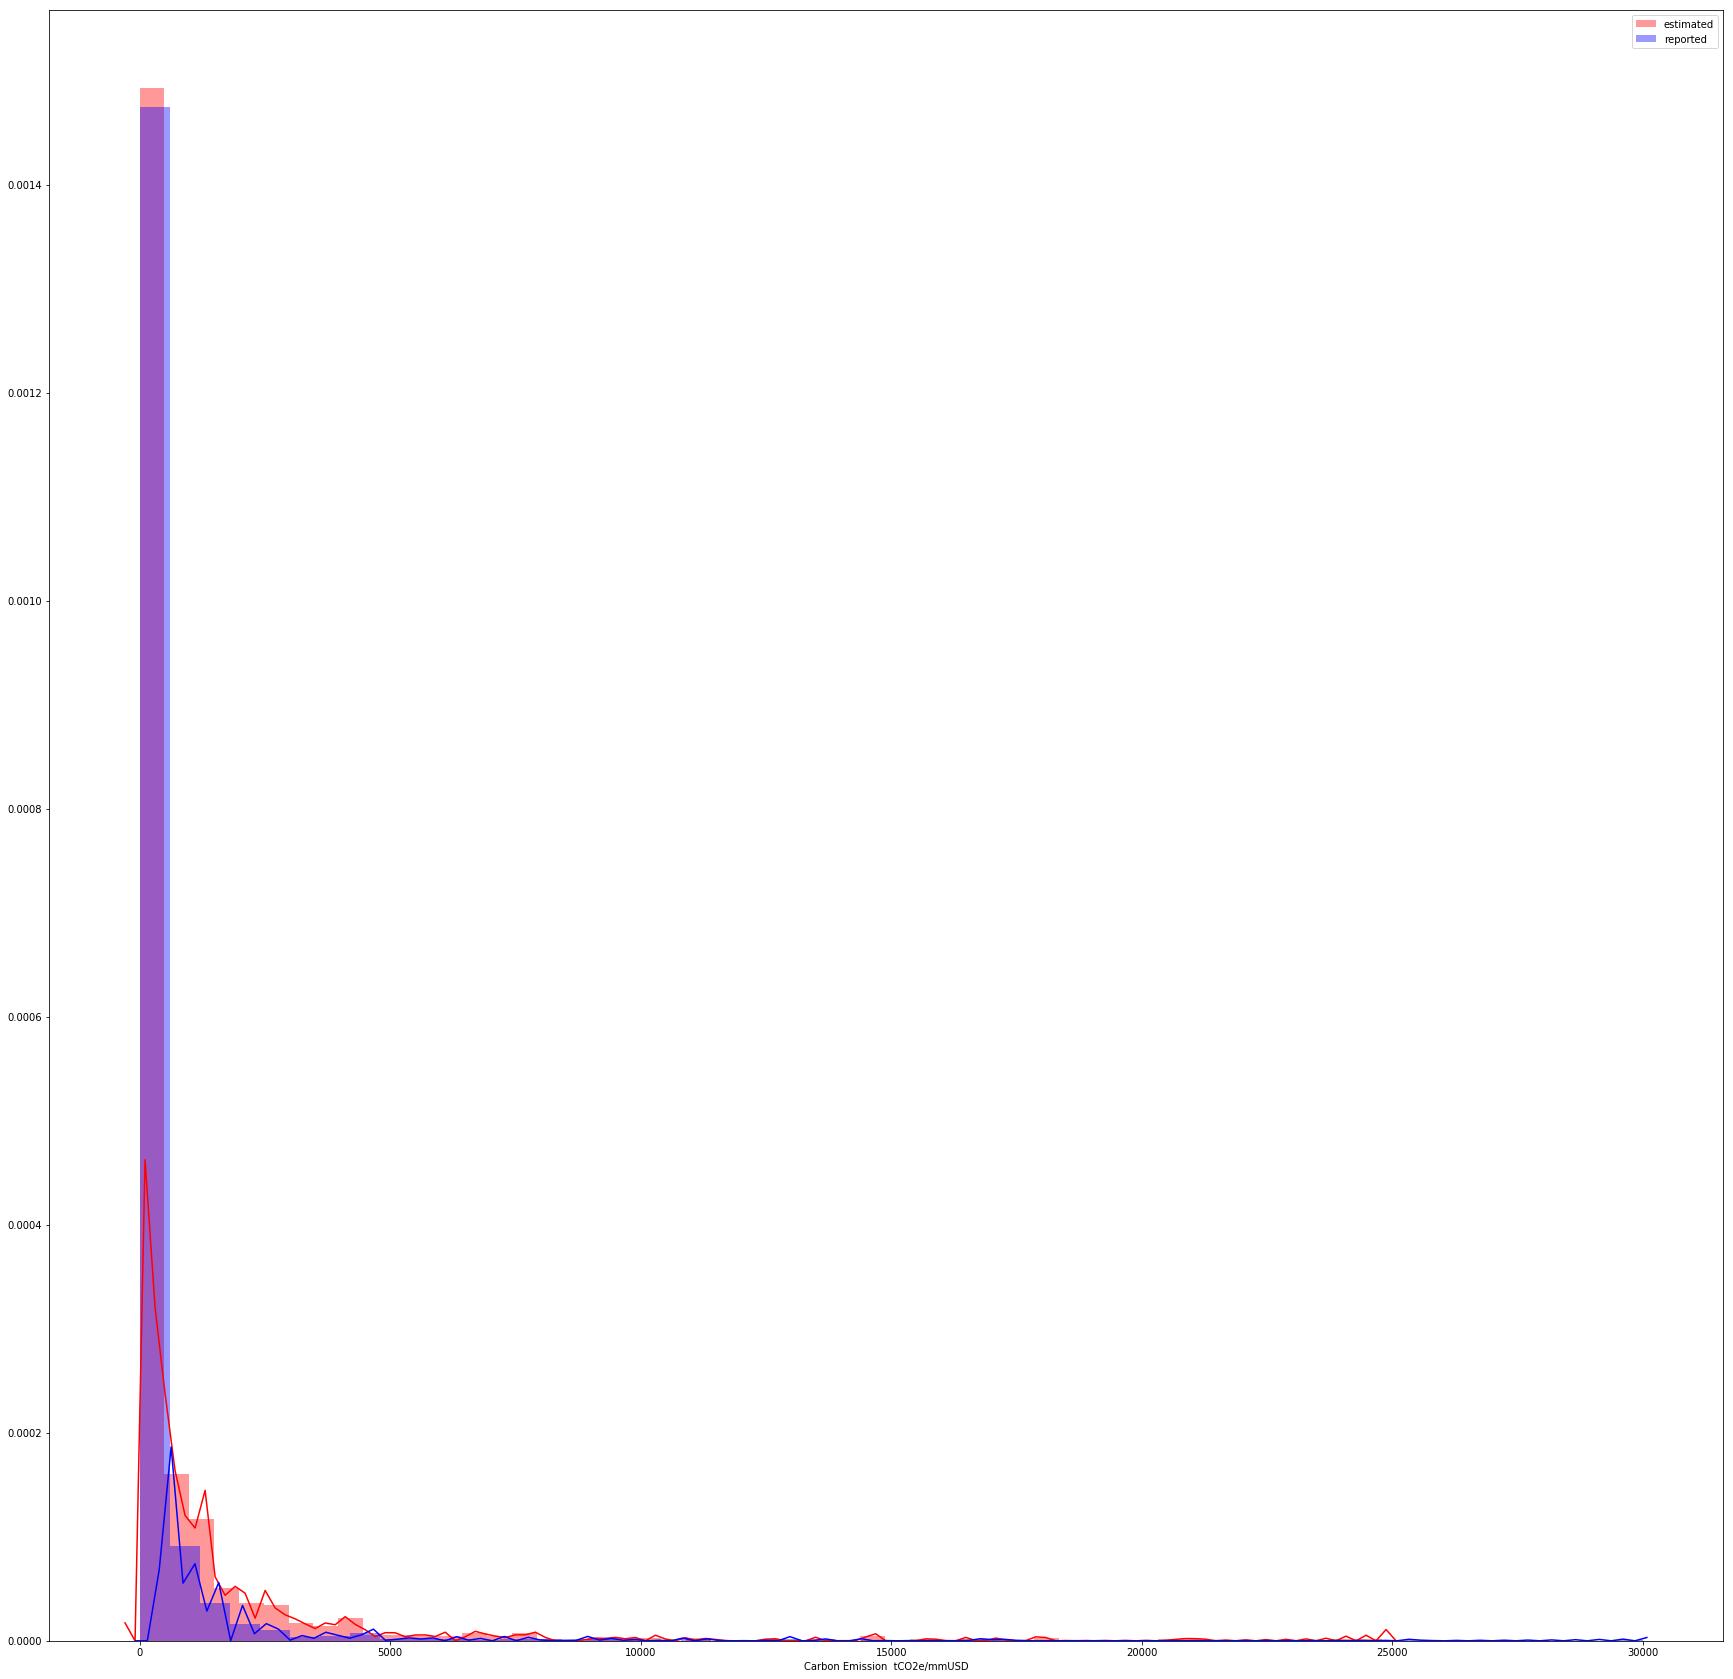

In [50]:
plt.figure(figsize=(30,30))
sns.distplot(df1.loc[df1['Estimated or not']=="Estimated"]["Carbon Emission  tCO2e/mmUSD"],color="r",label="estimated")
sns.distplot(df1.loc[df1['Estimated or not']=="Reported"]["Carbon Emission  tCO2e/mmUSD"],color='b',label='reported')
plt.legend()

In [25]:
df.to_csv("predicting_carbon_emissions_cleaned_2.csv")

In [51]:
df_69 = df1.loc[df1['Estimated or not']=="Estimated"]["Carbon Emission  tCO2e/mmUSD"]

In [52]:
df_69

0         26.030882
2        926.111720
5         47.820958
6         16.392587
12       649.150979
           ...     
3854    1845.150515
3862       2.609680
3864      10.158400
3867    1260.520130
3868      31.710311
Name: Carbon Emission  tCO2e/mmUSD, Length: 1398, dtype: float64